In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

from neupy import algorithms, layers, environment, estimators

In [2]:
def Database():
    """compile data sets into a data library, the output will be a DataFrame"""
    data_1 = pd.read_excel('Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=3)
    data = data_1[['Name','Family', 'FP Exp.', 'CN Exp.']]
    result_1 = data.drop(index=0)
    result_1.reset_index(drop=True, inplace=True)
    data_2 = pd.read_excel('Flash Point and Cetane Number Predictions for Fuel Compounds.xls', skiprows=4)
    result_2 = data_2.loc[: , '-H': 'aaCa']
    result = pd.concat([result_1, result_2], axis=1)
    return result

In [3]:
df = Database()
df = df[np.isfinite(df['FP Exp.'])]
xa = np.linspace(200, 550)
x = df.loc[:,'-H':'aaCa']
y = df['FP Exp.']

array_x = x.values
array_y = y.values

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(array_x)
np.set_printoptions(precision=4) # summarize transformed data for x,, and also set up the descimal place of the value

D:\Miniconda\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [4]:
x_train, x_test, y_train, y_test = train_test_split(rescaledX, array_y, test_size=0.1, random_state=17)

In [5]:
grnn = algorithms.GRNN(std=0.3,verbose=True,)


Main information

[ALGORITHM] GRNN

[OPTION] verbose = True
[OPTION] epoch_end_signal = None
[OPTION] show_epoch = 1
[OPTION] shuffle_data = False
[OPTION] step = 0.1
[OPTION] train_end_signal = None
[OPTION] std = 0.3



In [6]:
grnn.train(x_train, y_train)
y_predict = grnn.predict(x_test)

In [7]:
estimators.rmse(y_predict, y_test)

24.611952544383474

In [9]:
y_predict_train = grnn.predict(x_train)

In [10]:
print("MSE value for GRNN method:", mean_squared_error(y_test, y_predict))

MSE value for GRNN method: 605.748208047


In [11]:
print("r2 value for GRNN method:", r2_score(y_test, y_predict))

r2 value for GRNN method: 0.741459742996


In [12]:
print("MSE value for GRNN method:", mean_squared_error(y_train, y_predict_train))

MSE value for GRNN method: 663.667040309


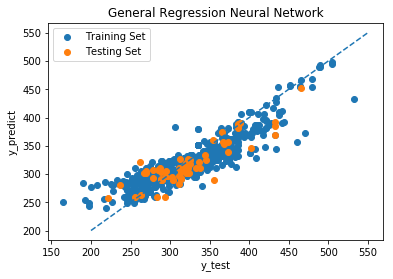

In [13]:
plt.scatter(y_train, y_predict_train, label='Training Set')
plt.scatter(y_test, y_predict, label='Testing Set')
plt.plot(xa, xa, linestyle='--')
plt.title('General Regression Neural Network')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.legend()